In [26]:
import pandas as pd

# Cargar los datos desde el archivo CSV
data_file = "/content/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(data_file)

# Visualizar las primeras filas del conjunto de datos
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [27]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [29]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [30]:
# Verifico si hay datos faltantes
print(df.isnull().sum())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


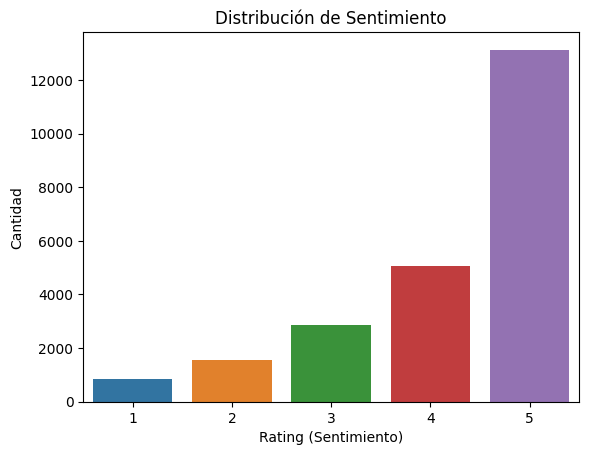

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame
# Suponiendo que ya tienes cargados los datos en 'df'

# Análisis de distribución de etiquetas de sentimiento (Rating)
sns.countplot(x='Rating', data=df)
plt.title('Distribución de Sentimiento')
plt.xlabel('Rating (Sentimiento)')
plt.ylabel('Cantidad')
plt.show()



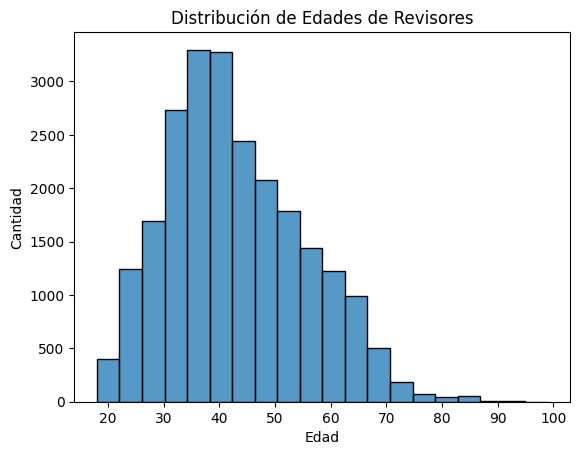

In [32]:
# Análisis de edades de los revisores
sns.histplot(df['Age'], bins=20)
plt.title('Distribución de Edades de Revisores')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()



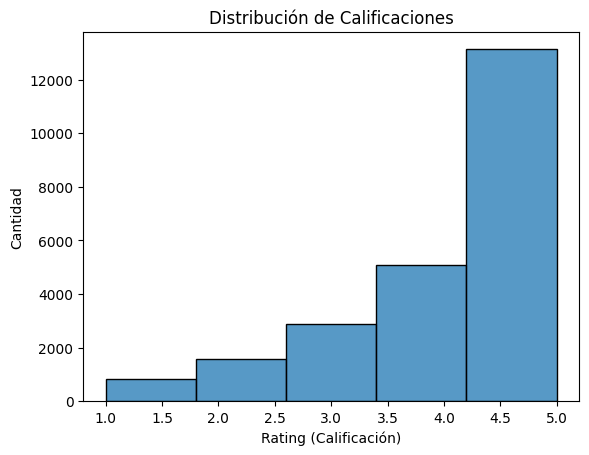

In [33]:
# Análisis de distribución de calificaciones (Rating)
sns.histplot(df['Rating'], bins=5)
plt.title('Distribución de Calificaciones')
plt.xlabel('Rating (Calificación)')
plt.ylabel('Cantidad')
plt.show()



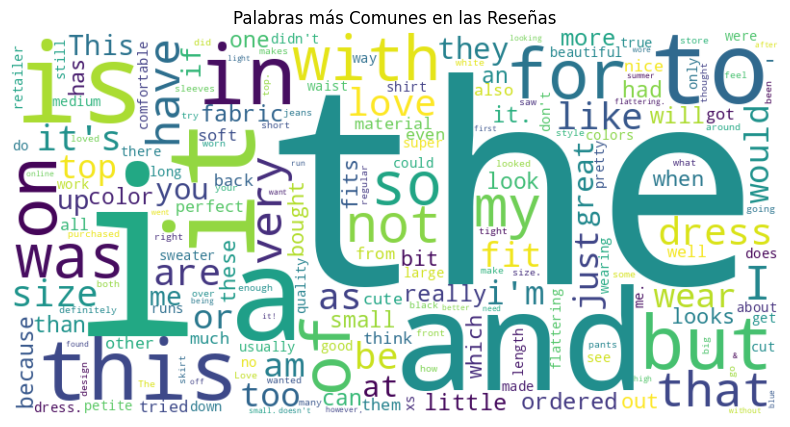

In [34]:
# Análisis de las palabras más comunes en las reseñas
from collections import Counter
from wordcloud import WordCloud

# Combinar todas las reseñas en un solo texto
all_reviews_text = ' '.join(df['Review Text'].dropna().tolist())

# Contar la frecuencia de cada palabra
word_freq = Counter(all_reviews_text.split())

# Crear la nube de palabras con las palabras más comunes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más Comunes en las Reseñas')
plt.show()



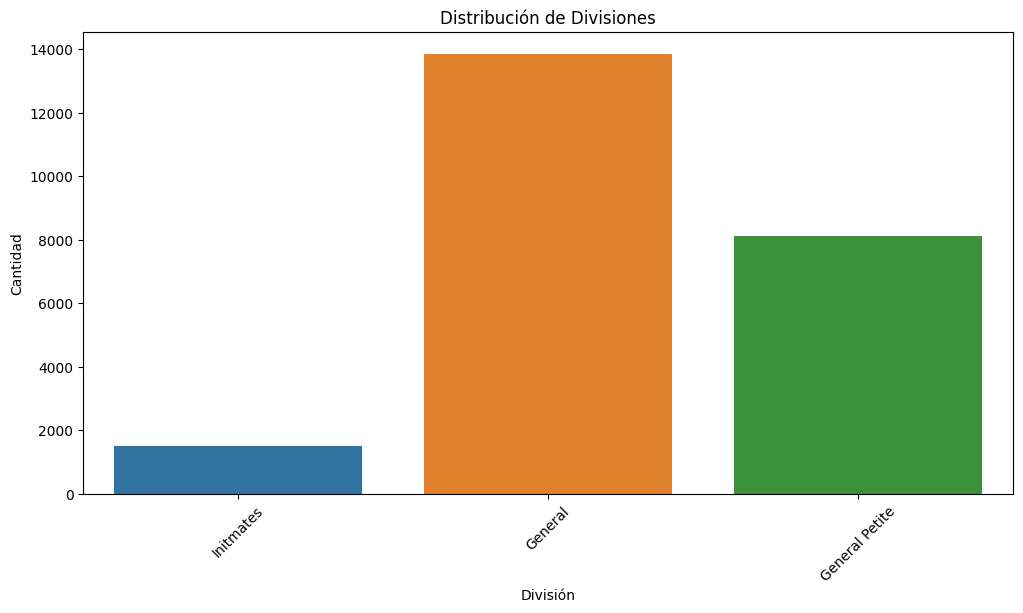

In [35]:
# Análisis de divisiones
plt.figure(figsize=(12, 6))
sns.countplot(x='Division Name', data=df)
plt.title('Distribución de Divisiones')
plt.xlabel('División')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

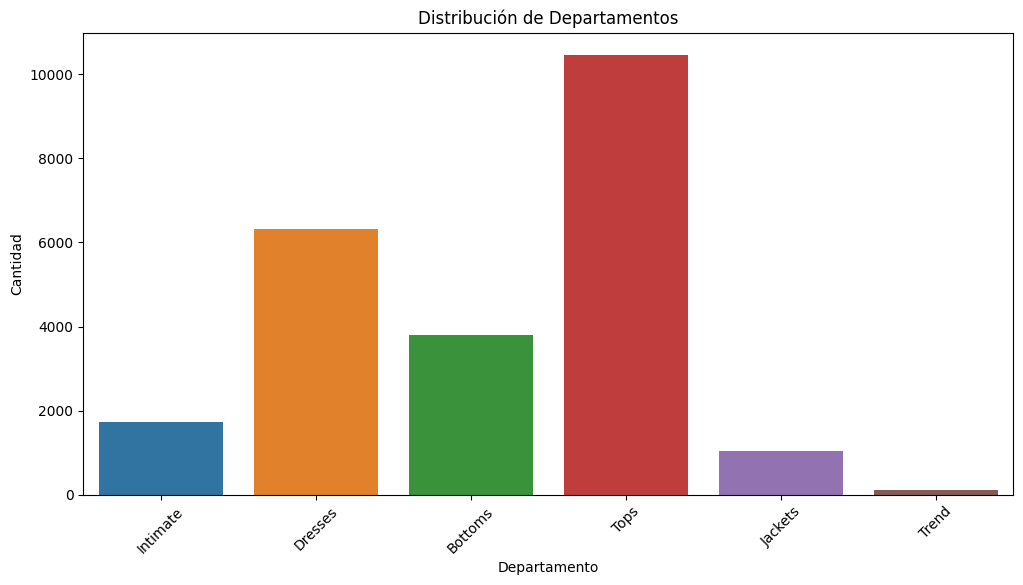

In [36]:
# Análisis de  departamentos
plt.figure(figsize=(12, 6))
sns.countplot(x='Department Name', data=df)
plt.title('Distribución de Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


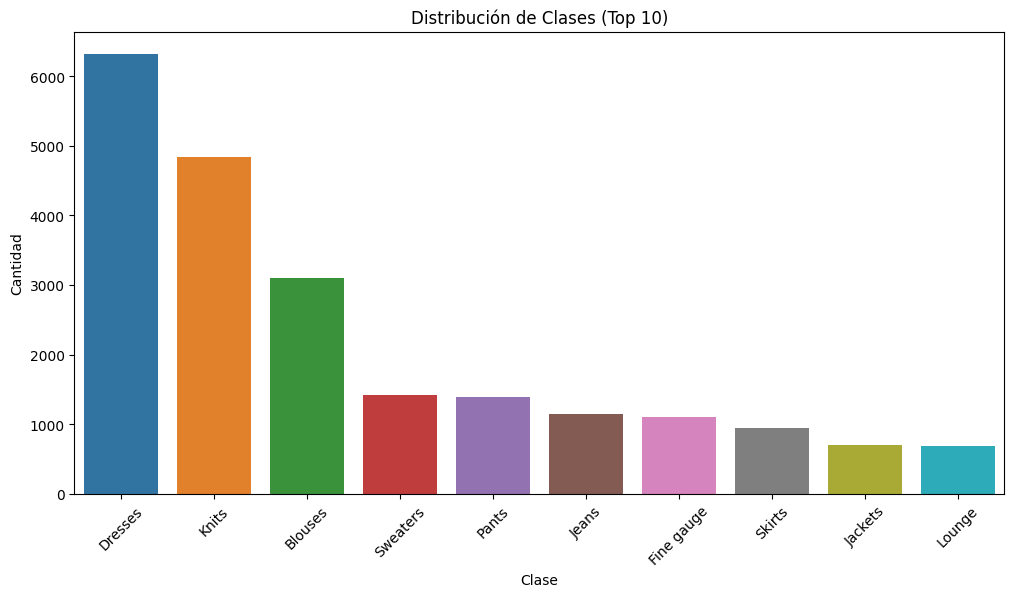

In [37]:
# Análisis de clases más frecuentes
plt.figure(figsize=(12, 6))
sns.countplot(x='Class Name', data=df, order=df['Class Name'].value_counts().index[:10])
plt.title('Distribución de Clases (Top 10)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [38]:
import pandas as pd

# Reemplazar los valores faltantes en columnas numéricas con el promedio
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Positive Feedback Count'] = df['Positive Feedback Count'].fillna(df['Positive Feedback Count'].mean())

# Reemplazar los valores faltantes en columnas de texto con la moda
df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
df['Review Text'] = df['Review Text'].fillna(df['Review Text'].mode().iloc[0])
df['Division Name'] = df['Division Name'].fillna(df['Division Name'].mode().iloc[0])
df['Department Name'] = df['Department Name'].fillna(df['Department Name'].mode().iloc[0])
df['Class Name'] = df['Class Name'].fillna(df['Class Name'].mode().iloc[0])


In [39]:
# Verifico si hay datos faltantes
print(df.isnull().sum())

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [40]:
import nltk
from nltk.corpus import stopwords
import string

# Descargar el conjunto de stopwords (palabras irrelevantes)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para realizar el preprocesamiento de texto
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizar el texto (convertirlo en una lista de palabras)
    words = text.split()
    # Eliminar palabras irrelevantes (stopwords)
    words = [word for word in words if word not in stop_words]
    # Unir las palabras nuevamente en un texto procesado
    processed_text = ' '.join(words)
    return processed_text

# Aplicar el preprocesamiento de texto a la columna de reseñas
df['processed_review'] = df['Review Text'].apply(preprocess_text)

# Visualizar las primeras filas del conjunto de datos con la columna procesada
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                 Love it!   
1           1         1080   34                 Love it!   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1     

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Etiquetar las reseñas como "positivas" (1) o "negativas" (0)
df['Sentiment'] = df['Rating'].apply(lambda rating: 1 if rating >= 4 else 0)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorización del texto usando TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar el número de características para reducir el tiempo de entrenamiento
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Entrenar un modelo de clasificación (SVM) para análisis de sentimiento
model = SVC(kernel='linear')
model.fit(X_train_vectorized, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_vectorized)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy del modelo:", accuracy)
print("\nReporte de clasificación:\n", report)


Accuracy del modelo: 0.8746275010642827

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.62      0.70      1090
           1       0.89      0.95      0.92      3608

    accuracy                           0.87      4698
   macro avg       0.84      0.79      0.81      4698
weighted avg       0.87      0.87      0.87      4698



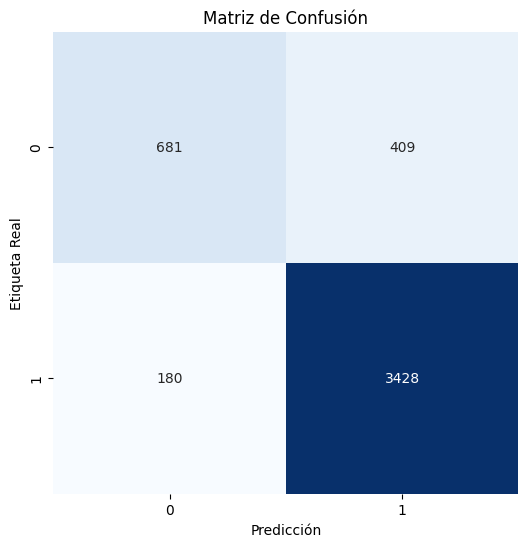

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión en un mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


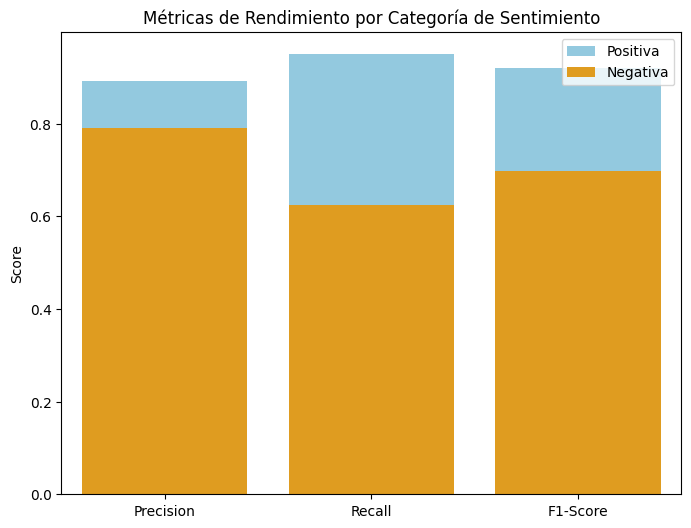

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las métricas de rendimiento del reporte de clasificación
metrics = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas de precisión, recall y F1-score para ambas categorías
precision_pos = metrics['1']['precision']
recall_pos = metrics['1']['recall']
f1_pos = metrics['1']['f1-score']
precision_neg = metrics['0']['precision']
recall_neg = metrics['0']['recall']
f1_neg = metrics['0']['f1-score']

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=['Precision', 'Recall', 'F1-Score'], y=[precision_pos, recall_pos, f1_pos], color='skyblue', label='Positiva')
sns.barplot(x=['Precision', 'Recall', 'F1-Score'], y=[precision_neg, recall_neg, f1_neg], color='orange', label='Negativa')
ax.set_ylabel('Score')
ax.set_title('Métricas de Rendimiento por Categoría de Sentimiento')
ax.legend()
plt.show()
